In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

In [3]:
train_data, test_data = imdb['train'], imdb['test']

In [4]:
tokenizer = info.features['text'].encoder
tokenizer.subwords

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_',
 't_',
 'with_',
 'for_',
 '.<',
 'on_',
 'but_',
 'movie_',
 ' (',
 'are_',
 'his_',
 'have_',
 'film_',
 'not_',
 'ing_',
 'be_',
 'ed_',
 'you_',
 ' "',
 'it',
 'd_',
 'an_',
 'he_',
 'by_',
 'at_',
 'one_',
 'who_',
 'y_',
 'from_',
 'e_',
 'or_',
 'all_',
 'like_',
 'they_',
 '" ',
 'so_',
 'just_',
 'has_',
 ') ',
 'her_',
 'about_',
 'out_',
 'This_',
 'some_',
 'ly_',
 'movie',
 'film',
 'very_',
 'more_',
 'It_',
 'would_',
 'what_',
 'when_',
 'which_',
 'good_',
 'if_',
 'up_',
 'only_',
 'even_',
 'their_',
 'had_',
 'really_',
 'my_',
 'can_',
 'no_',
 'were_',
 'see_',
 'she_',
 '? ',
 'than_',
 '! ',
 'there_',
 'get_',
 'been_',
 'into_',
 ' - ',
 'will_',
 'much_',
 'story_',
 'because_',
 'ing',
 'time_',
 'n_',
 'we_',
 'ed',
 'me_',
 ': ',
 'most_',
 'other_',
 'don',
 'do_',
 'm_',
 'es_',
 'how_',
 'also

In [5]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]


In [6]:
original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

The original string: TensorFlow, from basics to mastery


In [7]:
for ts in tokenized_string:
    print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [8]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [9]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [13]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 9s 22ms/step - loss: 0.6855 - accuracy: 0.5383 - val_loss: 0.6537 - val_accuracy: 0.5813
Epoch 2/10
391/391 [==============================] - 8s 22ms/step - loss: 0.5393 - accuracy: 0.7898 - val_loss: 0.4424 - val_accuracy: 0.8354
Epoch 3/10
391/391 [==============================] - 9s 22ms/step - loss: 0.3558 - accuracy: 0.8784 - val_loss: 0.3502 - val_accuracy: 0.8654
Epoch 4/10
391/391 [==============================] - 9s 23ms/step - loss: 0.2845 - accuracy: 0.8999 - val_loss: 0.3191 - val_accuracy: 0.8774
Epoch 5/10
391/391 [==============================] - 9s 23ms/step - loss: 0.2496 - accuracy: 0.9104 - val_loss: 0.3079 - val_accuracy: 0.8795
Epoch 6/10
391/391 [==============================] - 9s 23ms/step - loss: 0.2217 - accuracy: 0.9213 - val_loss: 0.3046 - val_accuracy: 0.8809
Epoch 7/10
391/391 [==============================] - 9s 24ms/step - loss: 0.2052 - accuracy: 0.9292 - val_loss: 0.3087 - val_accuracy: 0.8820

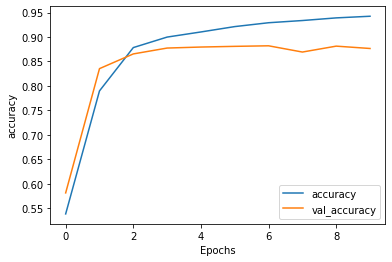

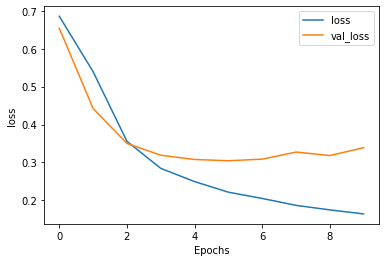

In [14]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [15]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(8185, 64)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
    word = tokenizer.decode([word_num])
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()